<a href="https://colab.research.google.com/github/Om03Swaroop/Gesture-Recognition/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/PJCT (2).zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall() # Indent this line to include it in the 'with' block
    print('Done')

Done


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# Disable XLA
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices=false'
# Set logging level to avoid unnecessary warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')
# Clear TensorFlow session
from tensorflow.keras import backend as K
K.clear_session()
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
def custom_data_generator(base_path, target_size=(150, 150), batch_size=32, class_mode='categorical'):
    # Indented the entire code block within the function
    datagen = ImageDataGenerator(rescale=1./255)
    all_images = []
    all_labels = []
    label_map = {}
    label_count = 0
    for main_folder in os.listdir(base_path):
        main_folder_path = os.path.join(base_path, main_folder)
        if os.path.isdir(main_folder_path):
            for gesture_folder in os.listdir(main_folder_path):
                gesture_folder_path = os.path.join(main_folder_path, gesture_folder)
                if os.path.isdir(gesture_folder_path):
                    if gesture_folder not in label_map:
                        label_map[gesture_folder] = label_count
                        label_count += 1
                    for img_file in os.listdir(gesture_folder_path):
                        img_path = os.path.join(gesture_folder_path, img_file)
                        img = load_img(img_path, target_size=target_size)
                        img_array = img_to_array(img)
                        all_images.append(img_array)
                        all_labels.append(label_map[gesture_folder])
    all_images = np.array(all_images)
    all_labels = np.array(all_labels)
    datagen.fit(all_images)
    while True:
        for start in range(0, len(all_images), batch_size):
            end = min(start + batch_size, len(all_images))
            yield datagen.flow(all_images[start:end], all_labels[start:end], batch_size=batch_size)
# Paths to your datasets
leapGestRecog_path = '/content/PJCT'
leapgestrecog_path = '/content/PJCT/handGes'
# Creating generators
train_generator = custom_data_generator(leapGestRecog_path)
validation_generator = custom_data_generator(leapgestrecog_path)
import os
# Base path to the dataset
base_path = '/content/PJCT/handGes'
# Check if the base directory exists
if os.path.exists(base_path):
    # Indented this block of code to be within the if statement
    base_contents = os.listdir(base_path)
    print(f"Contents of the base directory {base_path}: {base_contents}")
    # Check for leapGestRecog directory within the base path
    dataset_path = os.path.join(base_path, '/content/PJCT')
    if os.path.exists(dataset_path):
        dataset_contents = os.listdir(dataset_path)
        print(f"Contents of the dataset directory {dataset_path}: {dataset_contents}")
    else:
        print(f"The dataset directory {dataset_path} does not exist.")
else:
    print(f"The base directory {base_path} does not exist.")


Contents of the base directory /content/PJCT/handGes: ['PEACE', 'THUMBS UP', 'handges', 'YO', 'HELLO']
Contents of the dataset directory /content/PJCT: ['handGes']


In [ ]:
def get_file_paths_and_labels(base_path):
    # Indented the code block within the function
    file_paths = []
    labels = []
    gesture_folders = [
        'HELLO', 'PEACE', 'THUMBS UP', 'YO'
    ]
    label_map = {gesture: idx for idx, gesture in enumerate(gesture_folders)}
    for subject in os.listdir(base_path):
        subject_path = os.path.join(base_path, subject)
        if os.path.isdir(subject_path):
            for gesture in gesture_folders:
                gesture_path = os.path.join(subject_path, gesture)
                if os.path.isdir(gesture_path):
                    for img_file in os.listdir(gesture_path):
                        img_path = os.path.join(gesture_path, img_file)
                        file_paths.append(img_path)
                        labels.append(label_map[gesture])
    return file_paths, labels
def display_images(file_paths, labels, label_map):
    # Indented all code within the function by adding 4 spaces
    unique_labels = list(label_map.values())
    label_to_name = {v: k for k, v in label_map.items()}
    plt.figure(figsize=(20, 20))
    for idx, label in enumerate(unique_labels):
        label_paths = [file_paths[i] for i in range(len(labels)) if labels[i] == label][:5]
        for i, img_path in enumerate(label_paths):
            img = load_img(img_path, color_mode='grayscale', target_size=(img_size, img_size))
            img = img_to_array(img) / 255.0
            plt.subplot(len(unique_labels), 5, idx * 5 + i + 1)
            plt.imshow(img.squeeze(), cmap='gray')
            plt.title(label_to_name[label])
            plt.axis('off')
    plt.show()
file_paths, labels = get_file_paths_and_labels(dataset_path)
print(f"First 10 file paths: {file_paths[:10]}")
print(f"First 10 labels: {labels[:10]}")

First 10 file paths: ['/content/PJCT/handGes/HELLO/Palm1 - Copy - Copy (2).jpg', '/content/PJCT/handGes/HELLO/Palm3 - Copy (3) - Copy.jpg', '/content/PJCT/handGes/HELLO/Palm1 - Copy (5).jpg', '/content/PJCT/handGes/HELLO/Palm3 - Copy (4) - Copy.jpg', '/content/PJCT/handGes/HELLO/Palm3 - Copy - Copy - Copy (2).jpg', '/content/PJCT/handGes/HELLO/Palm2 - Copy (5).jpg', '/content/PJCT/handGes/HELLO/Palm2 - Copy - Copy (3).jpg', '/content/PJCT/handGes/HELLO/Palm2 - Copy (3) - Copy.jpg', '/content/PJCT/handGes/HELLO/Palm3 - Copy - Copy (2).jpg', '/content/PJCT/handGes/HELLO/Palm2 - Copy (4) - Copy - Copy.jpg']
First 10 labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


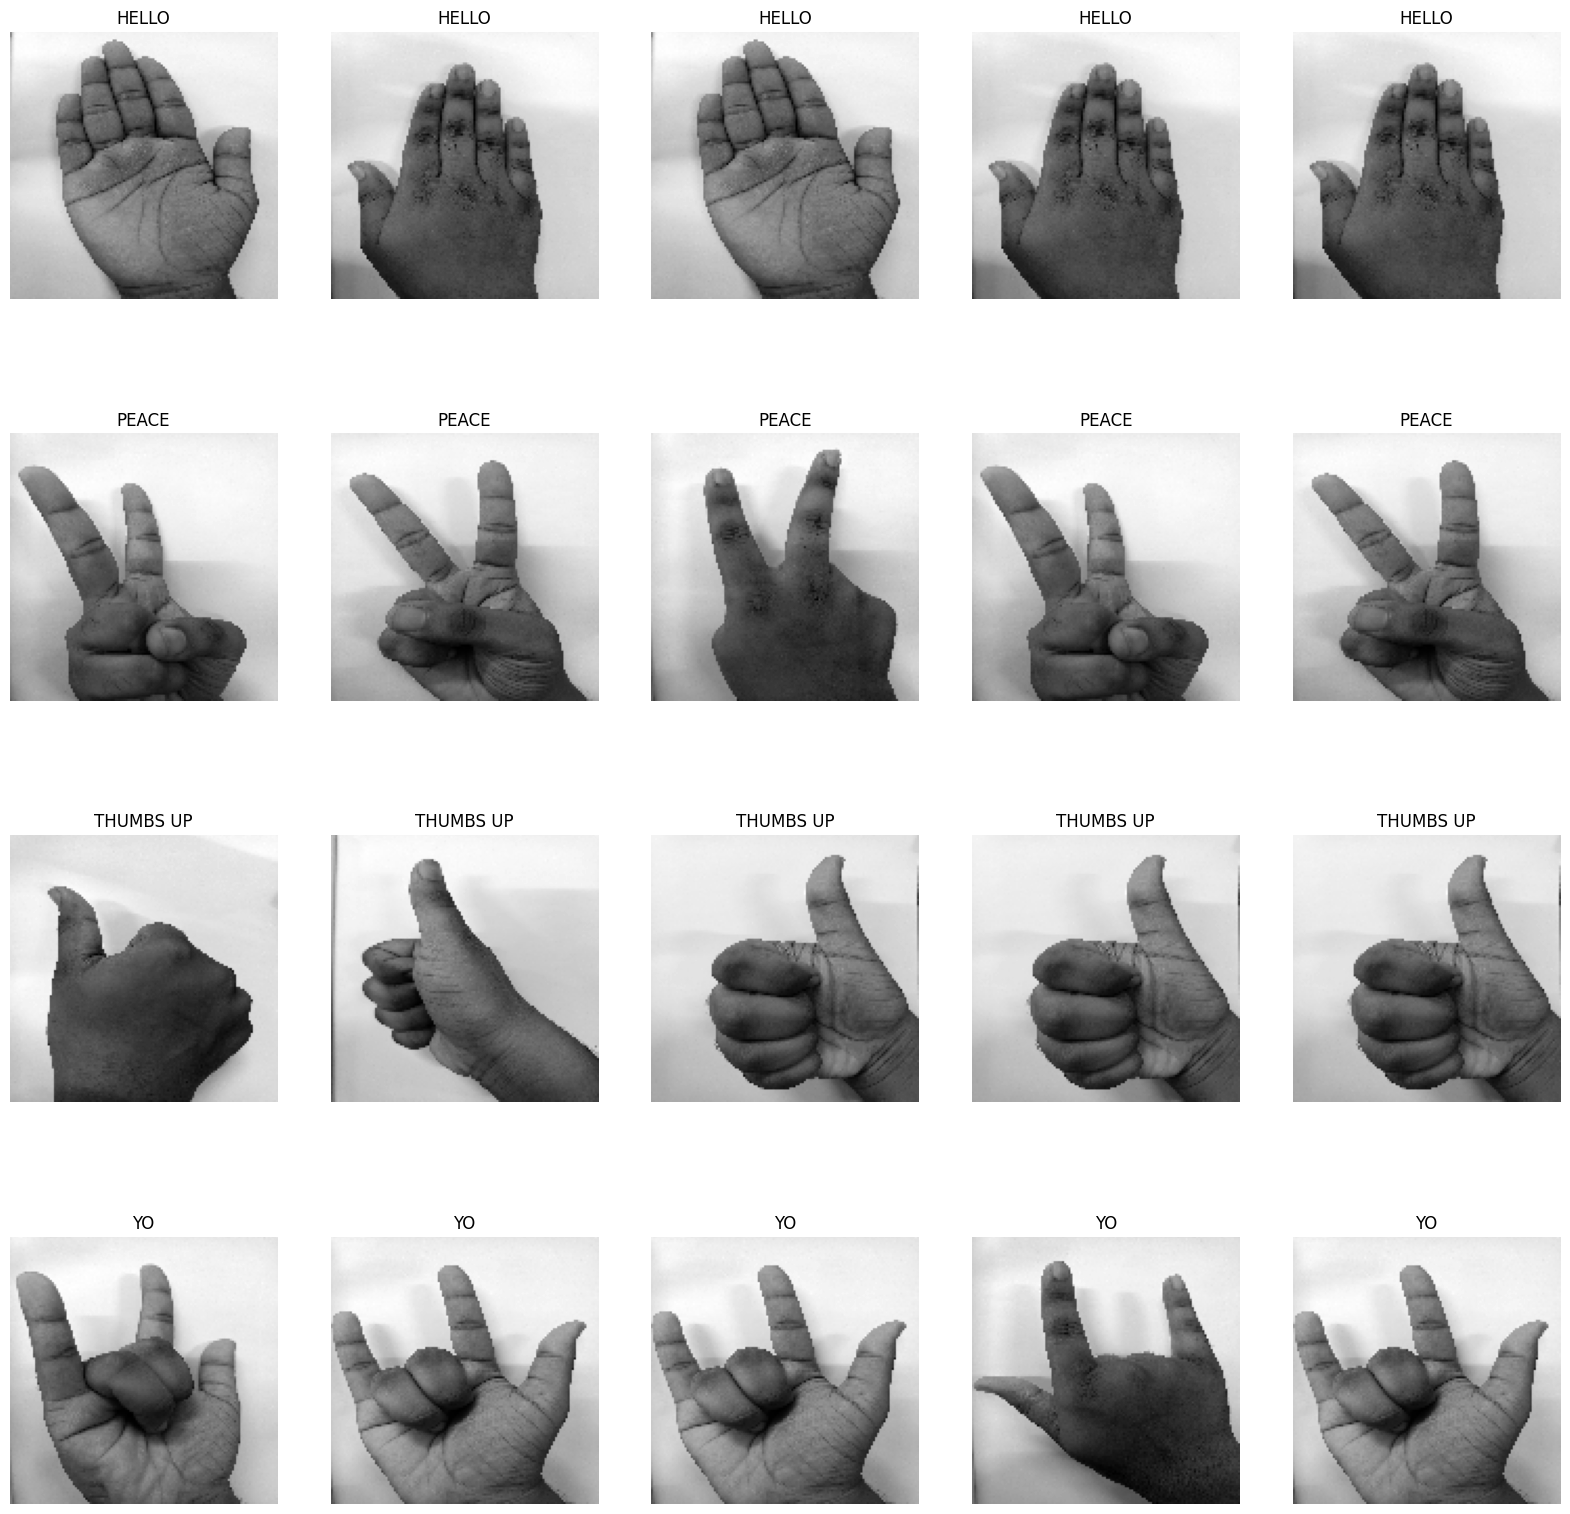

In [ ]:
img_size = 128 # Example value, you can adjust as needed
if not file_paths or not labels:
    raise ValueError("No file paths or labels found. Please check the dataset path and structure.") # Indented this line by adding 4 spaces
# Label map
gesture_folders = [
'HELLO', 'PEACE', 'THUMBS UP', 'YO'
]
label_map = {gesture: idx for idx, gesture in enumerate(gesture_folders)}
# Display the images
display_images(file_paths, labels, label_map)

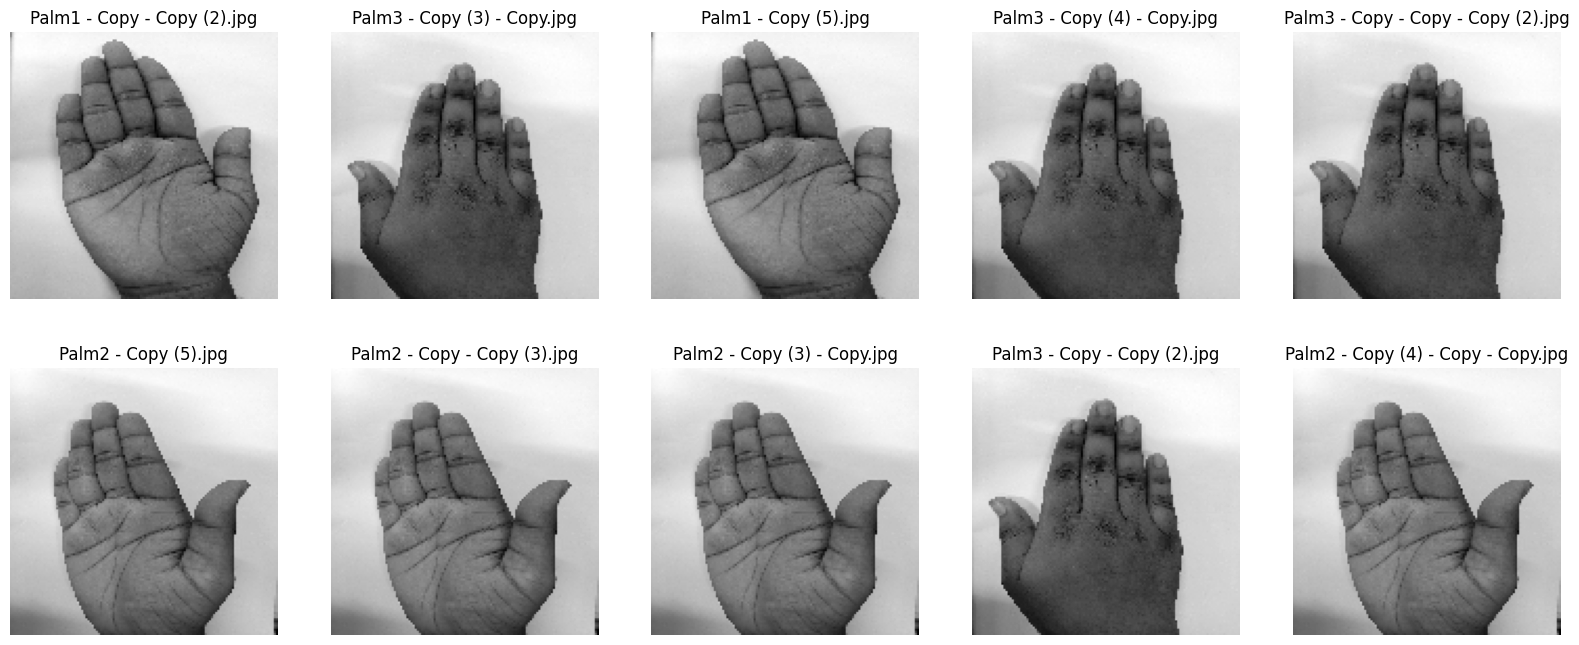

In [ ]:
def get_file_paths_01_palm(base_path):
    # Indented all code within the function by adding 4 spaces
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, 'HELLO')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

# Function to display images in two rows
def display_images(file_paths):
    # Indented all code within the function by adding 4 spaces
    plt.figure(figsize=(20, 8))
    for i, img_path in enumerate(file_paths[:10]): # Ensure only 10 images are displayed
        img = load_img(img_path, color_mode='grayscale', target_size=(img_size, img_size))
        img = img_to_array(img) / 255.0
        plt.subplot(2, 5, i + 1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(os.path.basename(img_path))
        plt.axis('off')
    plt.show()

# Get the file paths
file_paths_01_palm = get_file_paths_01_palm(dataset_path)
# Display the images
display_images(file_paths_01_palm)

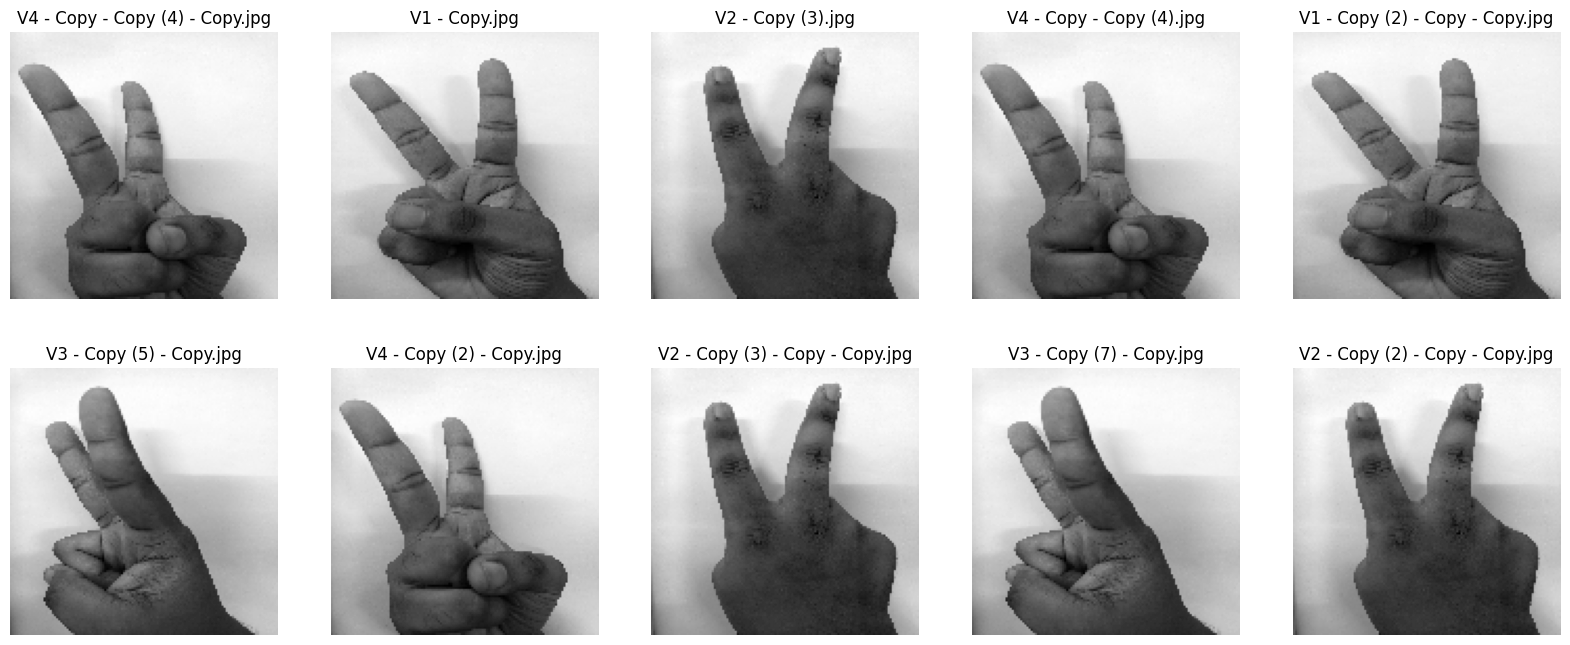

In [ ]:
def get_file_paths_02_l(base_path):
    # Indented all code within the function by adding 4 spaces
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, 'PEACE')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths
# Get the file paths
file_paths_02_l = get_file_paths_02_l(dataset_path)
# Display the images
display_images(file_paths_02_l)

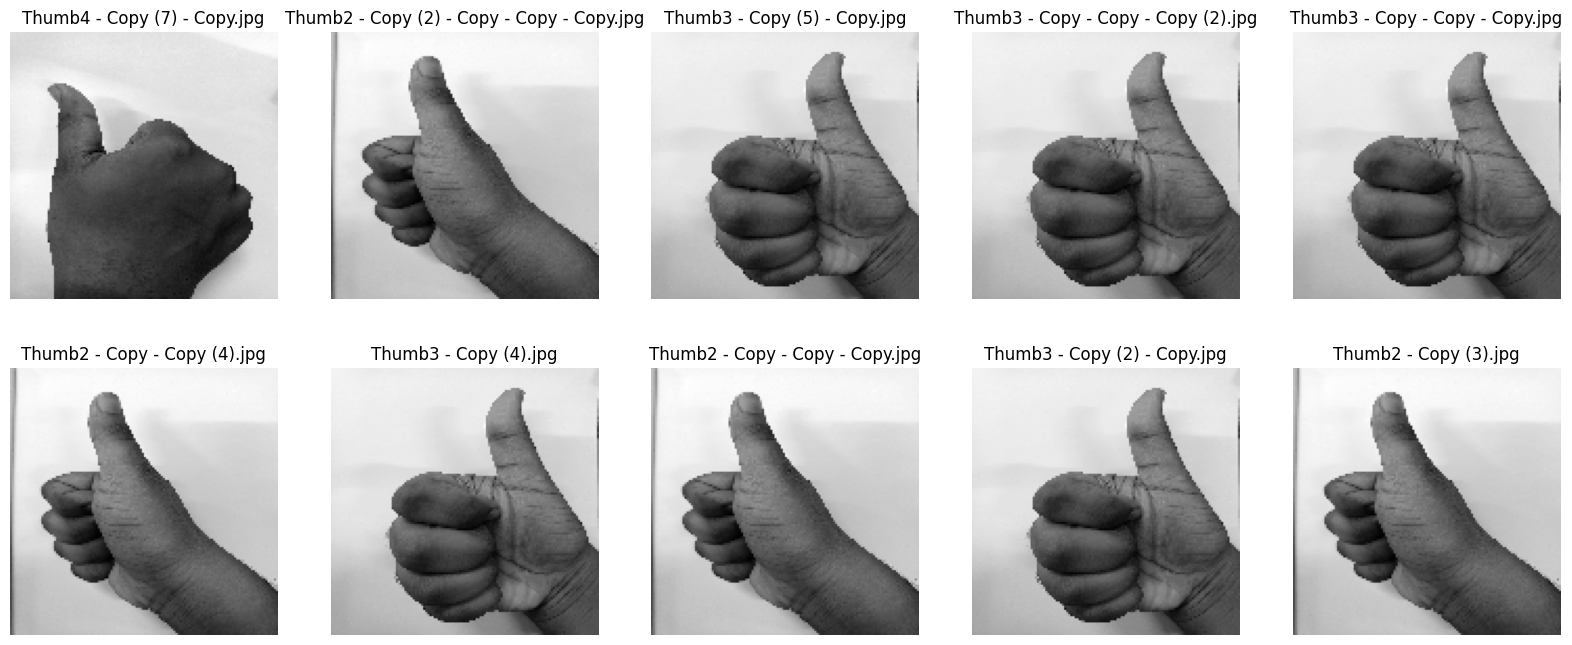

In [ ]:
def get_file_paths_03_fist(base_path):
    # Indented all code within the function by adding 4 spaces
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, 'THUMBS UP')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths
# Get the file paths
file_paths_03_fist = get_file_paths_03_fist(dataset_path)
# Display the images
display_images(file_paths_03_fist)

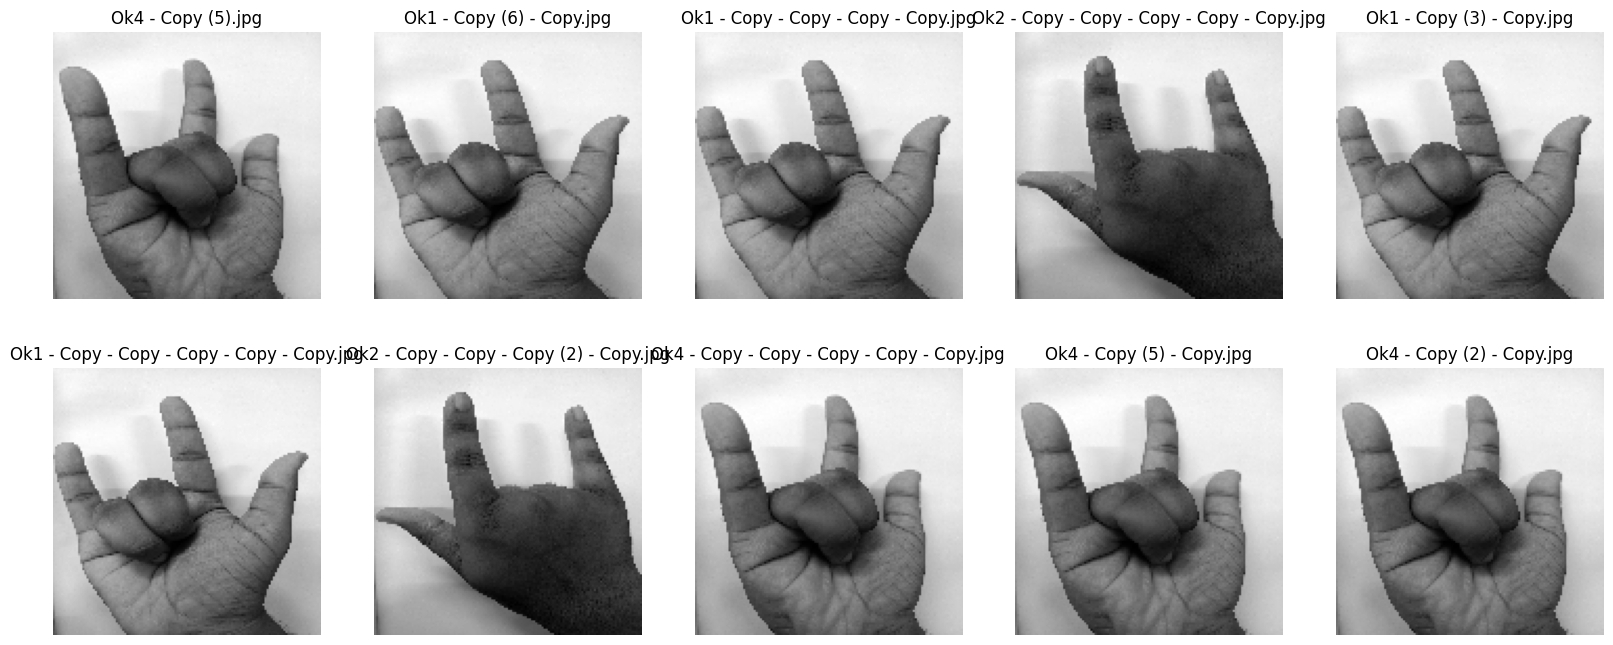

In [ ]:
def get_file_paths_04_fist_moved(base_path):
    # Indented all code within the function by adding 4 spaces
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, 'YO')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths
file_paths_04_fist_moved = get_file_paths_04_fist_moved(dataset_path)
display_images(file_paths_04_fist_moved)

In [ ]:
import numpy as np
# Assuming file_paths and labels are already loaded
# Example:
# file_paths = ["path1.png", "path2.png", "path3.png"]
# labels = [0, 1, 0]
# Ensure no variable named 'zip' exists
if 'zip' in locals():
    del zip # Indent this line to be part of the if block
# Zip the file paths and labels together
data = list(zip(file_paths, labels)) # Use the built-in zip function
# Shuffle the combined list
np.random.shuffle(data)
# Unzip the shuffled data back into file paths and labels
file_paths, labels = zip(*data)
# Convert back to lists if needed
file_paths = list(file_paths)
labels = list(labels)
# Print the shuffled file paths and labels to verify
print("Shuffled file paths:", file_paths[:10]) # Printing first 10 for brevity
print("Shuffled labels:", labels[:10]) # Printing first 10 for brevity

Shuffled file paths: ['/content/PJCT/handGes/HELLO/Palm3 - Copy - Copy (2) - Copy - Copy.jpg', '/content/PJCT/handGes/THUMBS UP/Thumb3 - Copy (3) - Copy.jpg', '/content/PJCT/handGes/THUMBS UP/Thumb4 - Copy - Copy (2).jpg', '/content/PJCT/handGes/HELLO/Palm2 - Copy - Copy - Copy (2) - Copy.jpg', '/content/PJCT/handGes/HELLO/Palm4 - Copy - Copy.jpg', '/content/PJCT/handGes/THUMBS UP/Thumb2 - Copy - Copy (3) - Copy.jpg', '/content/PJCT/handGes/THUMBS UP/Thumb3 - Copy (4) - Copy - Copy.jpg', '/content/PJCT/handGes/PEACE/V4 - Copy - Copy - Copy - Copy.jpg', '/content/PJCT/handGes/HELLO/Palm4 - Copy (2) - Copy - Copy.jpg', '/content/PJCT/handGes/THUMBS UP/Thumb2 - Copy (3) - Copy.jpg']
Shuffled labels: [0, 2, 2, 0, 0, 2, 2, 1, 0, 2]


In [ ]:
batch_size = 32 # Add this line to define batch_size, you can change 32 to your desired batch size
labels_str = [str(label) for label in labels]
dataframe = pd.DataFrame({'filename': file_paths, 'class': labels_str})
datagen = ImageDataGenerator(
rescale=1/255.0,
zoom_range=0.2,
width_shift_range=0.2,
height_shift_range=0.2,
validation_split=0.2 # Reserve 20% of the data for validation
)
train_generator = datagen.flow_from_dataframe(
dataframe=dataframe,
x_col='filename',
y_col='class',
target_size=(img_size, img_size),
batch_size=batch_size,
class_mode='categorical',
subset='training'
)
validation_generator = datagen.flow_from_dataframe(
dataframe=dataframe,
x_col='filename',
y_col='class',
target_size=(img_size, img_size),
batch_size=batch_size,
class_mode='categorical',
subset='validation'
)

Found 410 validated image filenames belonging to 4 classes.
Found 102 validated image filenames belonging to 4 classes.


In [ ]:
num_classes = 4  # Set this to the actual number of classes in your dataset

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer now matches the number of classes
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
model.compile(
optimizer=Adam(learning_rate=0.0001),
loss='categorical_crossentropy',
metrics=['accuracy']
)
early_stopping = EarlyStopping(
monitor='val_loss',
patience=3,
restore_best_weights=True
)
history = model.fit(
train_generator,
epochs=15,
validation_data=validation_generator,
callbacks=[early_stopping]
)


Epoch 1/15
13/13 [==============================] - 94s 7s/step - loss: 1.4311 - accuracy: 0.2537 - val_loss: 1.3702 - val_accuracy: 0.2157
Epoch 2/15
13/13 [==============================] - 84s 6s/step - loss: 1.3549 - accuracy: 0.3341 - val_loss: 1.3292 - val_accuracy: 0.4216
Epoch 3/15
13/13 [==============================] - 75s 6s/step - loss: 1.2967 - accuracy: 0.4683 - val_loss: 1.3177 - val_accuracy: 0.3627
Epoch 4/15
13/13 [==============================] - 76s 6s/step - loss: 1.2316 - accuracy: 0.4756 - val_loss: 1.1436 - val_accuracy: 0.6373
Epoch 5/15
13/13 [==============================] - 77s 6s/step - loss: 1.1690 - accuracy: 0.4854 - val_loss: 1.0898 - val_accuracy: 0.5882
Epoch 6/15
13/13 [==============================] - 74s 6s/step - loss: 1.0458 - accuracy: 0.6268 - val_loss: 0.9728 - val_accuracy: 0.6863
Epoch 7/15
13/13 [==============================] - 74s 6s/step - loss: 1.0010 - accuracy: 0.6293 - val_loss: 0.8664 - val_accuracy: 0.7059
Epoch 8/15
13/13 [==

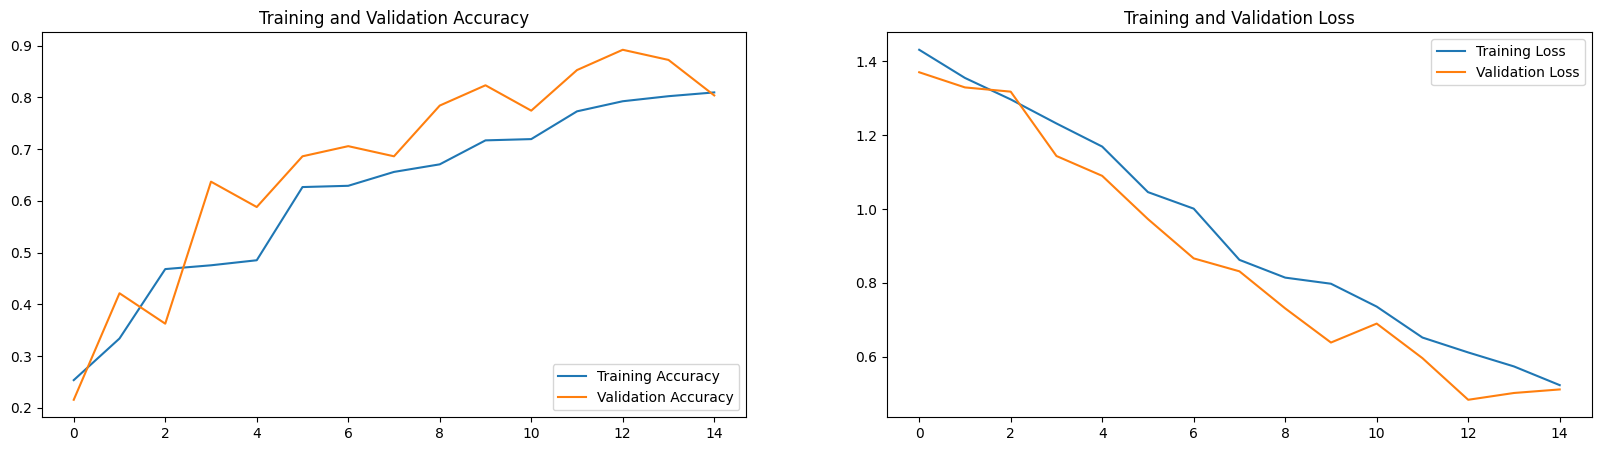

In [ ]:
model.save('model.h5')
from tensorflow import keras
loaded_model = keras.models.load_model('model.h5')
def plot_training_history(history):
    acc = history.history['accuracy'] # Indent this line and subsequent lines within the function
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
plot_training_history(history)

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

4/4 [==============================] - 13s 3s/step - loss: 0.5025 - accuracy: 0.8137
Validation Loss: 0.5024763941764832
Validation Accuracy: 0.813725471496582


4/4 [==============================] - 14s 3s/step


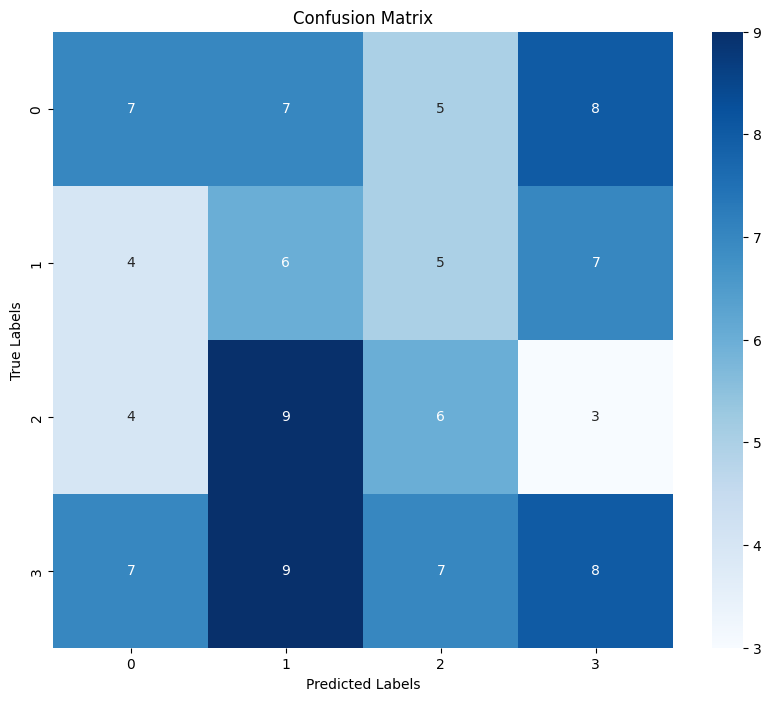

In [ ]:
# prompt: generate a confussion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for the validation set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the validation set
y_true = validation_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# prompt: classification report

from sklearn.metrics import classification_report

# ... (preceding code) ...

# Get predictions for the validation set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the validation set
y_true = validation_generator.classes

# Generate classification report
report = classification_report(y_true, y_pred_classes)
print(report)


4/4 [==============================] - 17s 4s/step
              precision    recall  f1-score   support

           0       0.28      0.19      0.22        27
           1       0.13      0.18      0.15        22
           2       0.21      0.27      0.24        22
           3       0.12      0.10      0.11        31

    accuracy                           0.18       102
   macro avg       0.19      0.18      0.18       102
weighted avg       0.18      0.18      0.18       102



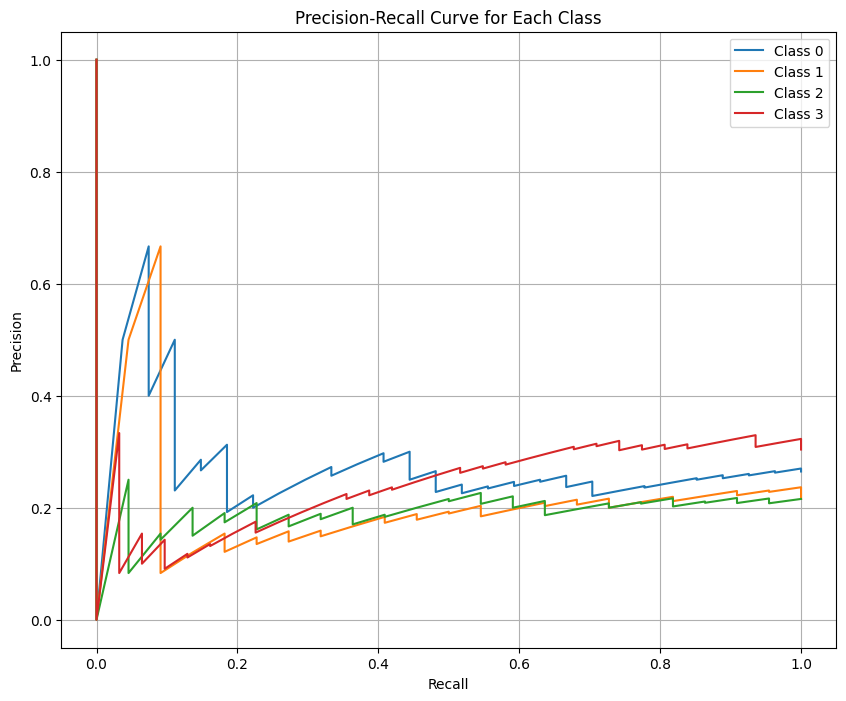

In [ ]:
# prompt: generate recall vs precision graph

from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Binarize the true labels for multi-class precision-recall curve
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))

# Calculate precision-recall curve for each class
precision = dict()
recall = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_pred[:, i])

# Plot precision-recall curves for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], label='Class {}'.format(i))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend()
plt.grid(True)
plt.show()


1/1 [==============================] - 0s 128ms/step


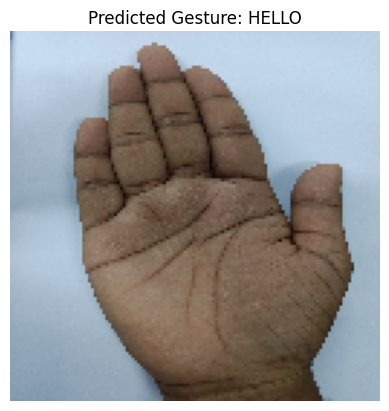

In [ ]:
from tensorflow.keras.models import load_model
def load_predict_and_display(img_path, model, img_size):
    gesture_classes = ['HELLO', 'PEACE', 'THUMBS UP', 'YO']  # Example

    if not os.path.isfile(img_path): # Use os.path.isfile to check for a file
        print(f"Error: Image file not found at {img_path}")
        return
    img = load_img(img_path, color_mode='rgb', target_size=(img_size, img_size)) # Load the image with the correct size
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    # Predict the gesture
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Display the image and the predicted class  -- Moved this block after image processing
    plt.imshow(img_array.squeeze(), cmap='gray') # Remove 'cmap' if image is in RGB
    plt.title(f'Predicted Gesture: {gesture_classes[predicted_class]}')
    plt.axis('off')
    plt.show()

# Make sure that the model was saved as 'model.h5' in the current directory.
# If it was saved with a different name or in a different location, adjust the file path accordingly.
loaded_model = load_model('model.h5')  # Load the model saved in the previous step

# Example image path - Verify this path is correct and points to an image file!
test_img_path = '/content/PJCT/handGes/HELLO/Palm1 - Copy (2) - Copy - Copy - Copy.jpg' # Example with an added image file name
img_size = 128 # Change this to 128 to match the model's expected input size
# Predict and display the gesture
load_predict_and_display(test_img_path, loaded_model, img_size)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotAllowedError: Permission denied


In [ ]:
from tensorflow.keras.models import load_model
def load_predict_and_display(img_path, model, img_size):
    gesture_classes = ['HELLO', 'PEACE', 'THUMBS UP', 'YO']  # Example

    if not os.path.isfile(img_path): # Use os.path.isfile to check for a file
        print(f"Error: Image file not found at {img_path}")
        return
    img = load_img(img_path, color_mode='rgb', target_size=(img_size, img_size)) # Load the image with the correct size
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    # Predict the gesture
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Display the image and the predicted class  -- Moved this block after image processing
    plt.imshow(img_array.squeeze(), cmap='gray') # Remove 'cmap' if image is in RGB
    plt.title(f'Predicted Gesture: {gesture_classes[predicted_class]}')
    plt.axis('off')
    plt.show()

# Make sure that the model was saved as 'model.h5' in the current directory.
# If it was saved with a different name or in a different location, adjust the file path accordingly.
loaded_model = load_model('model.h5')  # Load the model saved in the previous step

# Example image path - Verify this path is correct and points to an image file!
test_img_path = '/content/photo.jpg' # Example with an added image file name
img_size = 128 # Change this to 128 to match the model's expected input size
# Predict and display the gesture
load_predict_and_display(test_img_path, loaded_model, img_size)

Error: Image file not found at /content/photo.jpg


<IPython.core.display.Javascript object>

Saved to photo.jpg


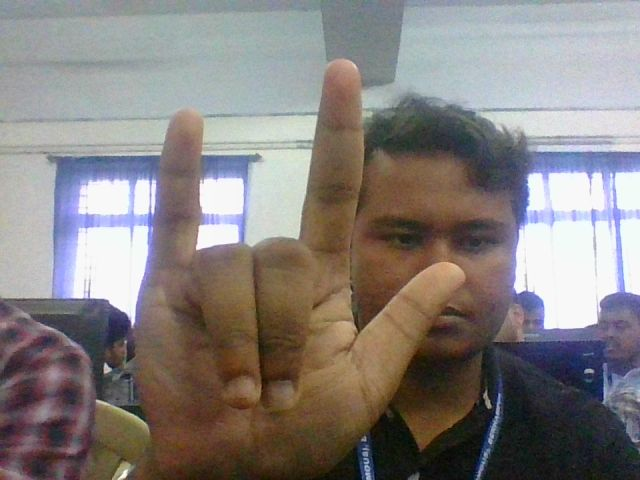

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

1/1 [==============================] - 0s 90ms/step


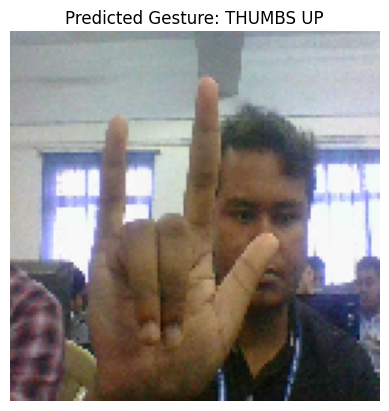

In [ ]:
from tensorflow.keras.models import load_model
def load_predict_and_display(img_path, model, img_size):
    gesture_classes = ['HELLO', 'PEACE', 'THUMBS UP', 'YO']  # Example

    if not os.path.isfile(img_path): # Use os.path.isfile to check for a file
        print(f"Error: Image file not found at {img_path}")
        return
    img = load_img(img_path, color_mode='rgb', target_size=(img_size, img_size)) # Load the image with the correct size
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    # Predict the gesture
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Display the image and the predicted class  -- Moved this block after image processing
    plt.imshow(img_array.squeeze(), cmap='gray') # Remove 'cmap' if image is in RGB
    plt.title(f'Predicted Gesture: {gesture_classes[predicted_class]}')
    plt.axis('off')
    plt.show()

# Make sure that the model was saved as 'model.h5' in the current directory.
# If it was saved with a different name or in a different location, adjust the file path accordingly.
loaded_model = load_model('model.h5')  # Load the model saved in the previous step

# Example image path - Verify this path is correct and points to an image file!
test_img_path = '/content/photo.jpg' # Example with an added image file name
img_size = 128 # Change this to 128 to match the model's expected input size
# Predict and display the gesture
load_predict_and_display(test_img_path, loaded_model, img_size)

1/1 [==============================] - 0s 90ms/step


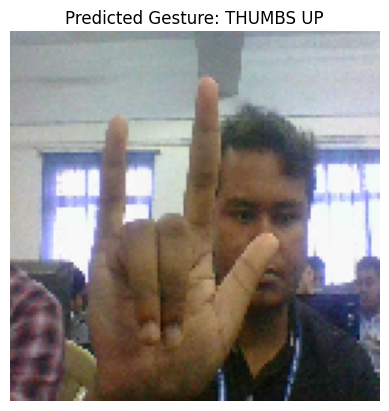

In [ ]:
from tensorflow.keras.models import load_model
def load_predict_and_display(img_path, model, img_size):
    gesture_classes = ['HELLO', 'PEACE', 'THUMBS UP', 'YO']  # Example

    if not os.path.isfile(img_path): # Use os.path.isfile to check for a file
        print(f"Error: Image file not found at {img_path}")
        return
    img = load_img(img_path, color_mode='rgb', target_size=(img_size, img_size)) # Load the image with the correct size
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    # Predict the gesture
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Display the image and the predicted class  -- Moved this block after image processing
    plt.imshow(img_array.squeeze(), cmap='gray') # Remove 'cmap' if image is in RGB
    plt.title(f'Predicted Gesture: {gesture_classes[predicted_class]}')
    plt.axis('off')
    plt.show()

# Make sure that the model was saved as 'model.h5' in the current directory.
# If it was saved with a different name or in a different location, adjust the file path accordingly.
loaded_model = load_model('model.h5')  # Load the model saved in the previous step

# Example image path - Verify this path is correct and points to an image file!
test_img_path = '/content/photo.jpg' # Example with an added image file name
img_size = 128 # Change this to 128 to match the model's expected input size
# Predict and display the gesture
load_predict_and_display(test_img_path, loaded_model, img_size)

1/1 [==============================] - 0s 153ms/step


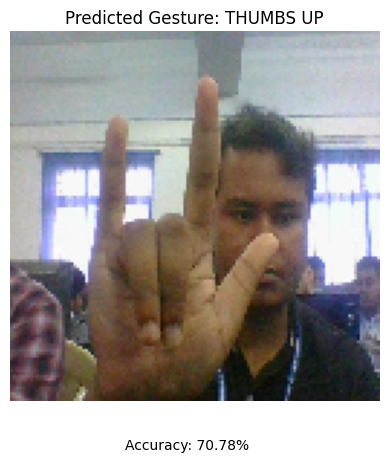

In [ ]:
from tensorflow.keras.models import load_model
def load_predict_and_display(img_path, model, img_size):
    gesture_classes = ['HELLO', 'PEACE', 'THUMBS UP', 'YO']  # Example

    if not os.path.isfile(img_path): # Use os.path.isfile to check for a file
        print(f"Error: Image file not found at {img_path}")
        return
    img = load_img(img_path, color_mode='rgb', target_size=(img_size, img_size)) # Load the image with the correct size
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    # Predict the gesture
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Display the image and the predicted class  -- Moved this block after image processing
    plt.imshow(img_array.squeeze(), cmap='gray') # Remove 'cmap' if image is in RGB
    plt.title(f'Predicted Gesture: {gesture_classes[predicted_class]}')
    # Add the text string 's' and vertical position 'y' for figtext
    plt.figtext(0.5, 0.01, f'Accuracy: {prediction[0][predicted_class] * 100:.2f}%', ha='center') # Display accuracy
    plt.axis('off')
    plt.show()

# Make sure that the model was saved as 'model.h5' in the current directory.
# If it was saved with a different name or in a different location, adjust the file path accordingly.
loaded_model = load_model('model.h5')  # Load the model saved in the previous step

# Example image path - Verify this path is correct and points to an image file!
test_img_path = '/content/photo.jpg' # Example with an added image file name
img_size = 128 # Change this to 128 to match the model's expected input size
# Predict and display the gesture
load_predict_and_display(test_img_path, loaded_model, img_size)